# Installations

In [ ]:
# To display numbers on top of bar plots without
# explicit coding we will need matplotlib>=3.4
# You may need to restart runtime after this step
# in Google Colab
! pip install matplotlib==3.5.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

from sklearn.tree import DecisionTreeClassifier

# Reading Data

In [ ]:
# To display all the columns of the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("./steel_faults.csv")

# Visualization and EDA on Data

In [ ]:
shape = df.shape
print(f"Number of Rows in the Dataset: {df.shape[0]}")
print(f"Number of Columns in the Dataset: {df.shape[1]}")

Number of Rows in the Dataset: 1941
Number of Columns in the Dataset: 28


Let us first look at the first five rows of the dataset to get a better understanding of the dataset

In [ ]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0


In [ ]:
columns = df.columns
print(f"Columns in the dataset: \n")
print(columns.values)

Columns in the dataset: 

['X_Minimum' 'X_Maximum' 'Y_Minimum' 'Y_Maximum' 'Pixels_Areas'
 'X_Perimeter' 'Y_Perimeter' 'Sum_of_Luminosity' 'Minimum_of_Luminosity'
 'Maximum_of_Luminosity' 'Length_of_Conveyer' 'TypeOfSteel_A300'
 'TypeOfSteel_A400' 'Steel_Plate_Thickness' 'Edges_Index' 'Empty_Index'
 'Square_Index' 'Outside_X_Index' 'Edges_X_Index' 'Edges_Y_Index'
 'Outside_Global_Index' 'LogOfAreas' 'Log_X_Index' 'Log_Y_Index'
 'Orientation_Index' 'Luminosity_Index' 'SigmoidOfAreas' 'Faults']


**Faults** is the target variable that we are trying to predict. Let us plot it and see its distribution

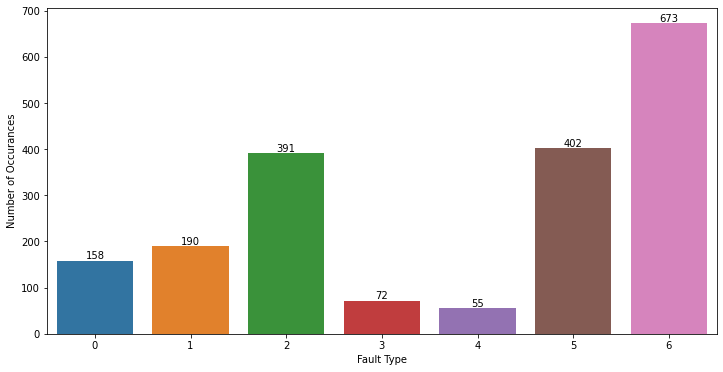

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
targetValueCount = df["Faults"].value_counts()
ax = sns.barplot(x=targetValueCount.index, y=targetValueCount)
ax.bar_label(ax.containers[0]) # THIS NEEDS matplotlib==3.5.2
ax.set_ylabel('Number of Occurances')
ax.set_xlabel('Fault Type')
plt.show()

As evident from the plot above we have **six unique types of fault**. **Fault Type 6 is the most common** whereas **Fault Type 4 is least common** and as you can the dataset is not balanced so  we are going to balance it in **Preparing Data** section. 

Let us also visualize the percentage distribution of the Faults

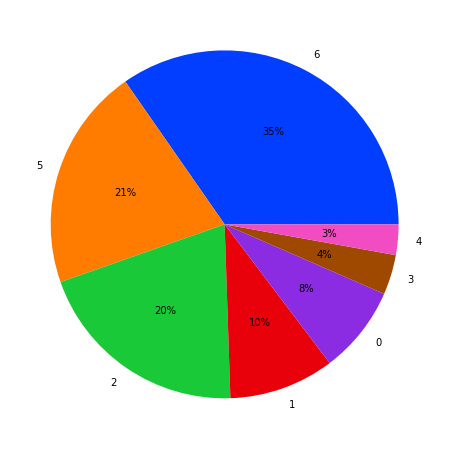

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)
palette_color = sns.color_palette('bright')
ax = plt.pie(targetValueCount, labels=targetValueCount.index, colors=palette_color, autopct='%.0f%%')
plt.show()

As shown in the above plot, Fault 6 occurs 35% times in our dataset whereas Fault 4 only occurs 3% times

Let us now check if we have any discrepancy in our dataset by checking null values

In [ ]:
df.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Faults                   0
dtype: int64

Fortunately this dataset doesn't have any Null Values so we dont need to apply any NULL data cleaning treatments on this dataset.

Let us now check the datatypes of each of our columns. Since our supervised learning models works on numerical data, we may need to convert the non-numeric datatype columns to numeric types

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

All 28 of our columns are numeric only. So we donot need to convert their types.

Since we are working on a Supervised task and we have a Target Variable whose value we are trying to predict by training a model, it is recommended to filter out the most important columns. These most important columns are the ones that affect the values of the target variable **Faults** the most. 

There are multiple methods to determine importance. Once such method is Correlation. Below we will draw a correlation heatmap and on the basis of it will calculate the most important columns. 

Note: Since we want to determine the important columns, we will discard the sign of correlation. i.e., we will make negative correlations as postive as we care about only magnitude

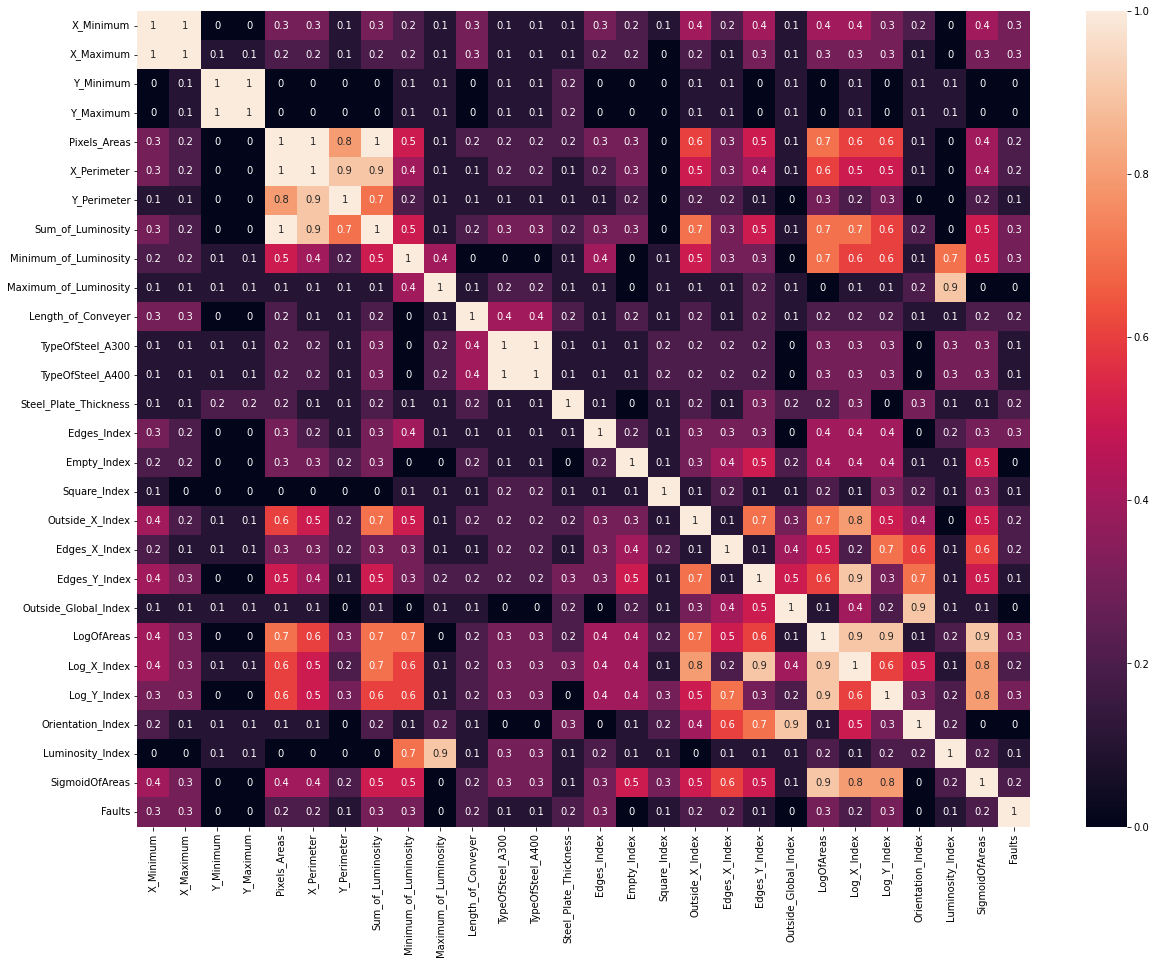

In [ ]:
# Visualizing the data using heatmap
plt.rcParams["figure.figsize"] = (20,15)
sns.heatmap(abs(round(df.corr(), 1)), annot = True)
plt.show()

In [ ]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,1459.160227,0.400309,0.599691,78.737764,0.331715,0.414203,0.570767,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,3.841319
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,144.577823,0.490087,0.490087,55.086032,0.299712,0.137261,0.271058,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,2.144175
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.060400,0.315800,0.361300,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,2.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,70.000000,0.227300,0.412100,0.555600,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,5.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,1650.000000,1.000000,1.000000,80.000000,0.573800,0.501600,0.818200,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,6.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,6.000000


One problem that we can clearly see from the above table is that the range of the individual columns is very different from each other.

For example, **Pixels_Areas** and **Minimum_of_Luminosity**. 

**Pixels_Areas** column has maximun value at **152655** whereas the maximum value of **Minimum_of_Luminosity** is **203** which is a big difference. 

Similarly, **Pixels_Areas** column has mean value at **1893.87** whereas the mean value of **Minimum_of_Luminosity** is **84.54** which is again a big difference. 

One way to deal with this range issue is that we scale whole of data into some particular predefined range. We will be using MinMaxScalar from Sklearn library to scale our dataset

In [ ]:
# We will be removing the Faults column as its our target column and we dont
# need to scale it
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.drop(columns='Faults'))
print(df.shape, scaled_data.shape)

(1941, 28) (1941, 27)


In [ ]:
# Our Dataframe will be converted into an array with values like this:
scaled_data

array([[0.02463343, 0.02691633, 0.02035198, ..., 0.91249307, 0.43120049,
        0.52576617],
       [0.37829912, 0.37858397, 0.19500631, ..., 0.89983356, 0.50170628,
        0.20363224],
       [0.48621701, 0.48624927, 0.11919013, ..., 0.83608211, 0.53388178,
        0.10896708],
       ...,
       [0.08504399, 0.09947338, 0.02927883, ..., 0.25631714, 0.611883  ,
        0.66844495],
       [0.08035191, 0.09713283, 0.0320304 , ..., 0.46925909, 0.59829372,
        0.9908059 ],
       [0.73958944, 0.7472206 , 0.00625833, ..., 0.39895093, 0.5393053 ,
        0.46606129]])

# Preparing Data for training

We Will first fetch our taget variable in a seperate variable **target** 

In [ ]:
target = df["Faults"]

We will also convert our target variable into categorical form

A problem that faces us is that the data is unbalanced so we are going to balance it using SMOTE

In [ ]:
balanced_data, target = SMOTE().fit_resample(scaled_data, target)
balanced_data.shape, target.shape

((4711, 27), (4711,))

We will now split our data into training and testing set. We will be using train_test_split function from sklearn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(balanced_data, target, test_size=0.30)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3297, 27), (1414, 27), (3297,), (1414,))

# Building Models

## ANN

Converting the data in Tensor as we are going to use Pytorch.

In [ ]:
X_train = Variable(torch.from_numpy(X_train).float())
y_train = Variable(torch.from_numpy(y_train.to_numpy()).long())
X_test  = Variable(torch.from_numpy(X_test).float())
y_test  = Variable(torch.tensor(y_test.to_numpy()).long())


1. Model consists of 6 layers
2. 1st layer shape of (columns,128)
3. 2nd layer shape of (128,128)
4. 3rd layer shape of (128,64)
5. 4th layer shape of (64,128)
6. 5th layer shape of (128,64)
7. 6th layer shspe of (64,7)
8. Use Relu as a function
9. for last layer Softmax as function it's basilaclly as probibilty type function.

In [ ]:

class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 128)
        self.layer5 = nn.Linear(128, 64)
        self.layer6 = nn.Linear(64, 7)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.relu(self.layer5(x))
        x = F.softmax(self.layer6(x), dim=1)
        return x

In [ ]:
model = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
loss_fn = nn.CrossEntropyLoss()

### Model Training

In [ ]:
EPOCHS = 400

In [ ]:
loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in range(EPOCHS):
    y_pred = model(X_train.float())
    loss = loss_fn(y_pred, y_train.long())
    loss_list[epoch] = loss.item()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test.float())
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

### Model Evaluation

Let us first plot Accuracy and Loss per Epoch the model was trained on

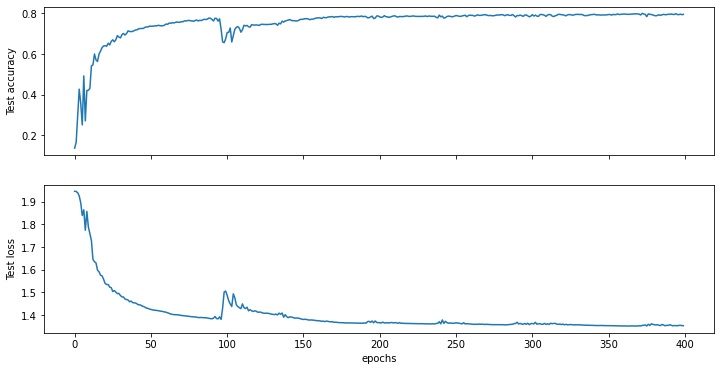

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)
ax1.plot(accuracy_list)
ax1.set_ylabel("Test accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("Test loss")
ax2.set_xlabel("epochs");

In [ ]:
y_pred = model(X_test)

Following cell will print the classification report

In [ ]:
print(classification_report(y_test.detach().numpy(), torch.argmax(y_pred, dim=1).detach().numpy()))


              precision    recall  f1-score   support

           0       0.67      0.91      0.77       192
           1       0.94      0.95      0.94       206
           2       0.91      0.86      0.89       202
           3       0.95      1.00      0.97       210
           4       0.87      0.98      0.92       213
           5       0.55      0.83      0.66       193
           6       0.00      0.00      0.00       198

    accuracy                           0.80      1414
   macro avg       0.70      0.79      0.74      1414
weighted avg       0.71      0.80      0.74      1414



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confMatrix = confusion_matrix(y_test.detach().numpy(), torch.argmax(y_pred, dim=1).detach().numpy())

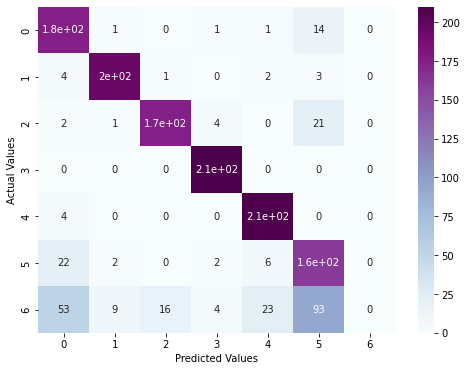

In [ ]:
plt.rcParams["figure.figsize"] = (8,6)
ANN_df_conf_matrix = pd.DataFrame(confMatrix)
sns.heatmap(ANN_df_conf_matrix, annot=True, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Decision Tree

### Finding optimal parameters

In [ ]:
parameters = {'criterion':('gini', 'entropy'), 'max_depth' : list(range(2,12)), 
'min_samples_split' : list(range(5,25)), 'min_samples_leaf': list(range(5,30))}
dtree = DecisionTreeClassifier()
gsCV = GridSearchCV(dtree, parameters, cv=5, refit='f1')
gsCV.fit(X_train, y_train)
print(gsCV.best_params_) 

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 5}


### Model Training

In [ ]:
dtree=DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=5, min_samples_split=5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=5,
                       min_samples_split=5)

### Model Evaluation

In [ ]:
print('Decision Tree accuracy on test data:',dtree.score(X_test,y_test))

Decision Tree accuracy on test data: 0.8352192362093352


In [ ]:
# getting the pridections
dt_y_pred = dtree.predict(X_test)

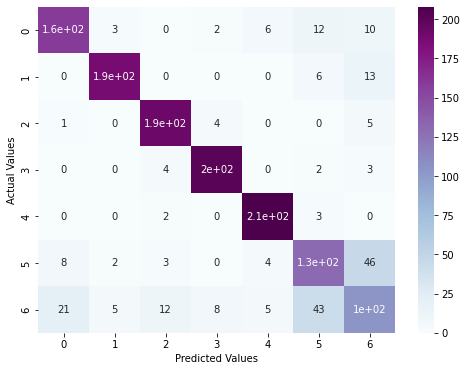

In [ ]:
# # confusion matrix visualisation
plt.rcParams["figure.figsize"] = (8,6)
confusionMatrix = confusion_matrix(y_test, y_pred=dt_y_pred)
dfConfMatrx = pd.DataFrame(confusionMatrix)
sns.heatmap(dfConfMatrx, annot=True, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

Following cell shows the classification report

In [ ]:
print(classification_report(dt_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       189
           1       0.91      0.95      0.93       197
           2       0.95      0.90      0.93       213
           3       0.96      0.93      0.95       215
           4       0.98      0.93      0.95       223
           5       0.67      0.66      0.67       196
           6       0.53      0.57      0.55       181

    accuracy                           0.84      1414
   macro avg       0.83      0.83      0.83      1414
weighted avg       0.84      0.84      0.84      1414



# Conclusion

As we can see from the confusion matrices of both models, both models have done amazing job classifying all the classes except the class 5 and 6 where they stumbled a bit. One iteresting fact is despite the complexity of the ANN model our decision tree has outdone it in all the performance metrics. Which confirms the No Free Lunch Theorm. 